In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from ruamel import yaml
import os
from load_cppimg import load_img
from MOLLI_fit import *
%matplotlib inline

1it [00:00,  5.37it/s]/home/bughht/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
4it [00:00, 13.95it/s]/home/bughht/ShanghaiTech/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:26: RuntimeWarning: overflow encountered in exp
  return A-B*np.exp(-t/T1)
489it [00:23, 21.41it/s]/home/bughht/ShanghaiTech/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:26: RuntimeWarning: overflow encountered in multiply
  return A-B*np.exp(-t/T1)
4096it [02:51, 23.92it/s]


[[1.17089188 1.13105866 1.16509529 ... 1.46323026 1.44844644 1.15146797]
 [1.53986162 1.6099942  1.6309086  ... 1.65199486 1.54418186 1.52813019]
 [1.10653853 1.12872878 1.12591243 ... 1.24297461 1.24046268 1.16781754]
 ...
 [1.13170769 1.15735267 1.21301983 ... 1.48216691 1.31465301 1.23032891]
 [1.14481204 1.10450394 1.16480625 ... 1.03926669 1.05919099 1.08092147]
 [1.16692996 1.21691994 1.07853945 ... 1.13028811 1.15061564 1.04257119]]


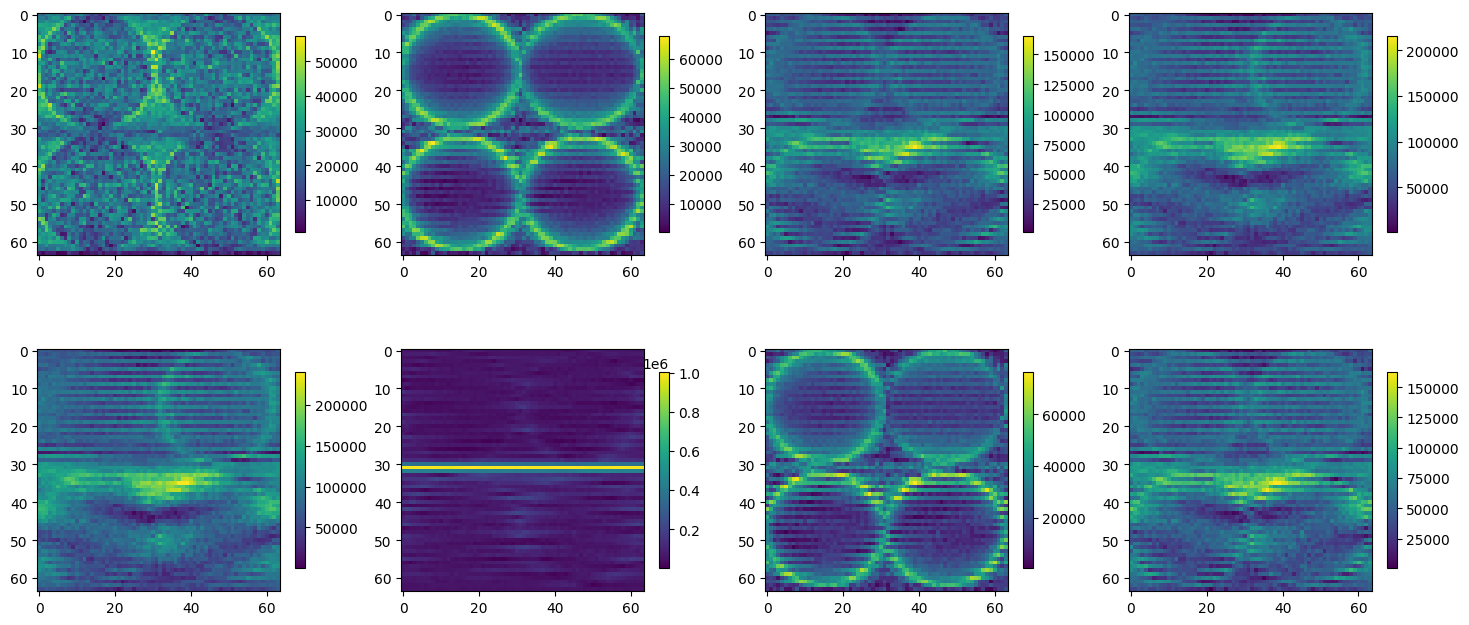

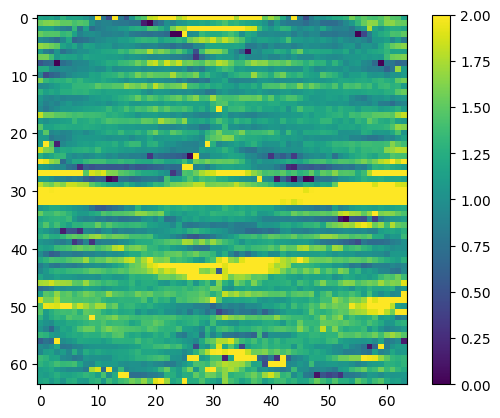

In [2]:
MOLLI_readout_img=[]
MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
for i in range(8):
    MOLLI_readout_img.append(load_img(
        "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA35_FOV256_K64_thick8_center_first", i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA10_FOV320_K64_center_first", i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

# print(MOLLI_readout_img[:, 15, 15])

plt.figure(figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(MOLLI_readout_img[i])
    plt.colorbar(shrink=0.7)

T1_result = np.zeros(MOLLI_readout_img[0].shape)

for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
    # T1_star, T1, A, B = MAGIR(
    T1_star, T1, A, B = MF_MAGIR(
        MOLLI_readout_t, MOLLI_readout_img[:, x, y])
    T1_result[x, y] = T1

print(T1_result)

plt.figure()
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0,2)